In [1]:
from CONSTANTS import API_KEY, API_SECRET

In [ ]:
from delta_client import run_diagnostics
run_diagnostics(API_KEY, API_SECRET, minutes_back=30, verbose=True)


In [10]:
from delta_client import DeltaIndiaClient, DeltaAPIError
from datetime import datetime, timezone, timedelta
verbose = True
days_back = 30
minutes_back = days_back*24*60
client = DeltaIndiaClient(API_KEY, API_SECRET, verbose=verbose)

# Balances

balance_result = client.get_wallet_balances()
print(f"Balance results : {balance_result}")

# Time window
end_dt = datetime.now(timezone.utc)
start_dt = end_dt - timedelta(minutes=minutes_back)
start_us = int(start_dt.timestamp() * 1_000_000)
end_us = int(end_dt.timestamp() * 1_000_000)

# Wallet txns

wallet_txns_result = client.get_wallet_transactions(start_us=start_us, end_us=end_us, max_pages=2)
print(f"Wallet txns results : {wallet_txns_result}")


# Fills

fill_results = client.get_fills(start_us=start_us, end_us=end_us, max_pages=2)
print(f"Fill results : {fill_results}")   


[DeltaClient 2025-08-29 15:29:14] REQUEST GET /v2/wallet/balances | signed='GET1756461554/v2/wallet/balances'
[DeltaClient 2025-08-29 15:29:15] RESPONSE 200 for /v2/wallet/balances
[DeltaClient 2025-08-29 15:29:15] ✅ OK /v2/wallet/balances
[DeltaClient 2025-08-29 15:29:15] Balances count=1
Balance results : [{'asset_id': 14, 'asset_symbol': 'USD', 'available_balance': '10.049101594477200001', 'available_balance_for_robo': '10.04910159', 'available_balance_inr': '854.17', 'balance': '134.0983497841', 'balance_inr': '11398.36', 'blocked_margin': '124.049248189622799999', 'commission': '0.7279495596228', 'cross_asset_liability': '0', 'cross_commission': '0', 'cross_locked_collateral': '0', 'cross_order_margin': '0', 'cross_position_margin': '0', 'id': 367988, 'interest_credit': '0', 'lien_amount': '0', 'order_margin': '0', 'pending_referral_bonus': '0', 'pending_trading_fee_credit': '0', 'portfolio_margin': '0', 'position_margin': '123.321298629999999999', 'referral_bonus': '0', 'strategy

In [11]:
wallet_txns_result

[{'amount': '-0.72790188',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '134.0983497841',
  'created_at': '2025-08-29T09:03:19.256782Z',
  'fund_id': None,
  'meta_data': {'amount_without_gst': '-0.61686588',
   'fill_uuid': '573f9781ad324013bbf5282fa315e8ca',
   'gst': '-0.111036',
   'product_symbol': 'SOLUSD'},
  'product_id': 14823,
  'transaction_type': 'commission',
  'user_id': 93020796,
  'uuid': '084e8549b8fe42dca2989c4ddbac2be9'},
 {'amount': '-0.00051126',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '134.8262516641',
  'created_at': '2025-08-29T09:02:33.610593Z',
  'fund_id': None,
  'meta_data': {'product_symbol': 'SOLUSD'},
  'product_id': 14823,
  'transaction_type': 'funding',
  'user_id': 93020796,
  'uuid': 'c2910b0be3ba45738771690c63556d77'},
 {'amount': '-2.256',
  'asset_id': 14,
  'asset_symbol': 'USD',
  'balance': '134.8267629241',
  'created_at': '2025-08-29T09:02:33.404453Z',
  'fund_id': None,
  'meta_data': {'entry_price': '206.23200000

In [13]:
wallet_txns_result
type_txns = []
for txn in wallet_txns_result:
    print(txn['transaction_type'])
    type_txns.append(txn['transaction_type'])

len(set(type_txns)), set(type_txns)

commission
funding
cashflow
commission
funding
cashflow
commission
funding
cashflow
commission
funding
cashflow
commission
funding
cashflow
cashflow
commission
cashflow
commission
funding
commission
cashflow
funding
commission
funding
cashflow
commission
cashflow
commission
funding
cashflow
commission
funding
cashflow
commission
cashflow
commission
funding
cashflow
commission
cashflow
commission
funding
cashflow
cashflow
cashflow
cashflow
commission
commission
funding
cashflow
commission
funding
commission
cashflow
commission
cashflow
commission
cashflow
funding
commission
funding
cashflow
commission
funding
cashflow
commission
funding
commission
cashflow
funding
commission
funding
cashflow
commission
funding
cashflow
commission
funding
cashflow
commission
commission
funding
cashflow
commission
funding
cashflow
cashflow
commission
funding
cashflow
commission
funding
cashflow
cashflow
commission
funding
commission
cashflow
funding
cashflow
commission
funding
commission
cashflow
funding


(4, {'cashflow', 'commission', 'deposit', 'funding'})

[DeltaClient 2025-09-02 23:37:48] REQUEST GET /v2/wallet/balances | signed='GET1756836468/v2/wallet/balances'
[DeltaClient 2025-09-02 23:37:48] RESPONSE 200 for /v2/wallet/balances
[DeltaClient 2025-09-02 23:37:48] ✅ OK /v2/wallet/balances
[DeltaClient 2025-09-02 23:37:48] Balances count=1
[DeltaClient 2025-09-02 23:37:48] REQUEST GET /v2/wallet/transactions?start_time=1725129000000000&end_time=1756836468369870&page_size=500 | signed='GET1756836468/v2/wallet/transactions?start_time=1725129000000000&end_time=1756836468369870&page_size=500'
[DeltaClient 2025-09-02 23:37:48] RESPONSE 200 for /v2/wallet/transactions
[DeltaClient 2025-09-02 23:37:48] ✅ OK /v2/wallet/transactions
[DeltaClient 2025-09-02 23:37:48] → paginate next after=g3QAAAACZAAKY3JlYXRlZF9hdHQAAAANZAAKX19zdHJ1Y3RfX2QAD0VsaXhpci5EYXRlVGltZWQACGNhbGVuZGFyZAATRWxpeGlyLkNhbGVuZGFyLklTT2QAA2RheWEaZAAEaG91cmEOZAALbWljcm9zZWNvbmRoAmIAB0i6YQZkAAZtaW51dGVhJmQABW1vbnRoYQhkAAZzZWNvbmRhJGQACnN0ZF9vZmZzZXRhAGQACXRpbWVfem9uZW0AAAAHRXRjL

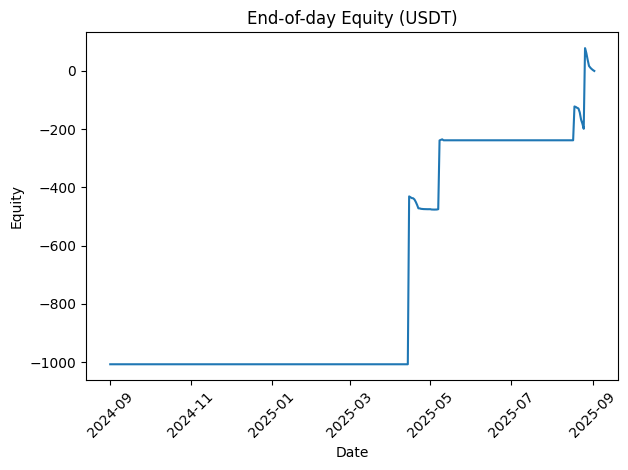

In [2]:
from utils_equity_series import fetch_daily_equity_series
from CONSTANTS import API_KEY, API_SECRET

df = fetch_daily_equity_series(
    api_key=API_KEY,
    api_secret=API_SECRET,
    start_date="2024-09-01",
    end_date="2025-09-02",
    base_ccy="USDT",
    verbose=True,   # prints request/signature logs from your working client
)

print(df.head())
#    date       equity
# 0  2025-07-01  1234.56
# 1  2025-07-02  1240.12
# ...

# Plot with matplotlib
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df["date"], df["equity"])
plt.title("End-of-day Equity (USDT)")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
from delta_txn_totals import fetch_totals
from CONSTANTS import API_KEY, API_SECRET

totals = fetch_totals(
    api_key=API_KEY,
    api_secret=API_SECRET,
    start_date="2023-08-01",
    end_date="2025-09-3",
    asset_symbol="USD",     # or None to include all assets
    verbose=True,
)

print(totals)
# {
#   'total_commission': -12.34,
#   'total_funding': 3.21,
#   'total_cashflow': 100.0,
#   'total_deposit': 50.0,
#   'count': 123,
#   'asset': 'USD',
#   'window_ist': '2025-08-01 .. 2025-08-29'
# }


[Totals 2025-09-03 00:02:56 ] Window IST: 2023-08-01 00:00:00+05:30 .. 2025-09-03 23:59:59+05:30
[Totals 2025-09-03 00:02:56 ] Window UTC: 2023-07-31 18:30:00+00:00 .. 2025-09-03 18:29:59+00:00
[Totals 2025-09-03 00:02:56 ] Micros: 1690828200000000 .. 1756924199000000
[DeltaClient 2025-09-03 00:02:56] REQUEST GET /v2/wallet/transactions?start_time=1690828200000000&end_time=1756924199000000&page_size=500 | signed='GET1756837976/v2/wallet/transactions?start_time=1690828200000000&end_time=1756924199000000&page_size=500'
[DeltaClient 2025-09-03 00:02:57] RESPONSE 200 for /v2/wallet/transactions
[DeltaClient 2025-09-03 00:02:57] ✅ OK /v2/wallet/transactions
[DeltaClient 2025-09-03 00:02:57] → paginate next after=g3QAAAACZAAKY3JlYXRlZF9hdHQAAAANZAAKX19zdHJ1Y3RfX2QAD0VsaXhpci5EYXRlVGltZWQACGNhbGVuZGFyZAATRWxpeGlyLkNhbGVuZGFyLklTT2QAA2RheWEaZAAEaG91cmEOZAALbWljcm9zZWNvbmRoAmIAB0i6YQZkAAZtaW51dGVhJmQABW1vbnRoYQhkAAZzZWNvbmRhJGQACnN0ZF9vZmZzZXRhAGQACXRpbWVfem9uZW0AAAAHRXRjL1VUQ2QACnV0Y19vZmZzZXR